<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/Problema30_piezas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 30**
El tiempo entre llegadas de piezas a una estación de ensamblado sigue una distribución exponencial con media $2$ minutos. La duración de la tarea llevada a cabo por el operario en dicha estación adopta una distribución exponencial con media $1$ minuto por pieza. Determine el tiempo medio de permanencia de las piezas en dicho proceso, el número de piezas promedio que están en el sistema y el número de piezas promedio que están en la cola.

# **Resolución**
## **1. Identifique las variables.**

Tenemos dos: 

1.   $t_1:=$ Tiempo entre llegadas de piezas a la estación de ensamblado.
2.   $t_2:=$ Tiempo que tarda el operario en concluir su trabajo para una pieza.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema, se sigue que las dos variables poseen una distribución exponencial $\,\mathrm{Exp}(\lambda_1)\,$ y $\,\mathrm{Exp}(\lambda_2)$ respectivamente.

**Nota:** Unidades de $\,\lambda_i\,$ piezas por minuto.

## **3. Modele las variables aleatorias.**

Habiendo deducido la distribución de cada variable aleatoria, se sigue que

  \begin{align*}
  t_1 &\sim \mathrm{Exp}(0.5) \\
  t_2 &\sim \mathrm{Exp}(1)
  \end{align*}

## **4. Defina el modelo del sistema y los objetivos de la simulación.**

Cada pieza $\,i\,$ arribará al sistema en el tiempo $\,\sum_{i=1}^n {t_1}_i$, con $\,n\,$ número total de piezas en el sistema que arribaron en el lapso estudiado.

Se seguirá un criterio de priorización FCFS ("*First Come, First Served*") o FIFO ("*First In, First Out*"); lo que significa que la primera pieza que entre al sistema será la primera atendida por el operario para su ensamble y así sucesivamente con las siguientes piezas.

### **Objetivo:**

Con el modelo descrito anteriormente, calcularemos los promedios solicitados en el problema para $\,n\,$ piezas, las cuales serán calculadas con un número de minutos $\,T\,$ arbitrario, e iremos calculando acumulativamente estos promedios.

Por lo tanto, implementamos el siguiente código:

In [333]:
import random
import numpy as np
from math import log
from scipy.stats import norm
import matplotlib.pyplot as plt

In [334]:
def observacion():                   # Función que nos da el tiempo en minutos que tardó en llegar una pieza al sistema después de la
  t1 = - 2 * log(random.random())    #anterior (lapso entre piezas) y el tiempo que el operario tardó en ensamblarla.
  t2 = - log(random.random())         # Fórmula para v.a. distribuidas exponencialmente a partir de v.a. uniformemente distribuidas:
  return t1,t2                        #     x = - (1/lambda) * ln(u),       con  x ~ Exp(lambda)  y  u ~ U(0,1)

In [335]:
observacion()

(2.9288937033058207, 1.732690511800134)

## **5. Diseñe el experimento.**

In [336]:
def experimento_W(T):
  t1,t2 = [],[]
  obs1,obs2 = observacion()
  t1.append(obs1)
  t2.append(obs2)

  evol_perma, t_perma, t_sal = [],[],[]
  sum_perma, acum, n = 0,0,0
  t_ent = [obs1]
  while t_ent[n] <= T:
    obs1,obs2 = observacion()
    t1.append(obs1)
    t2.append(obs2)
    t_ent.append(t_ent[n] + obs1)
    t_perma.append(t2[n] + acum)
    t_sal.append(t_ent[n] + t_perma[n])
    sum_perma += t_perma[n]
    evol_perma.append(sum_perma/(n+1))
    if t_perma[n] <= t1[n+1]:
      acum = 0
    else:
      acum += t2[n] - t1[n+1]
    n += 1
  n += 1
  t_perma.append(t2[-1] + acum)
  t_sal.append(t_ent[-1] + t_perma[-1])
  sum_perma += t_perma[-1]
  evol_perma.append(sum_perma/n)

  return n, evol_perma, t_ent, t_sal

In [337]:
def experimento_L_Lq(n, t_ent, t_sal):
  t_map = t_ent
  t_map.append(t_sal[-1])
  flag = [1]*n
  for i in range(n-1):
    for j in range(i, len(t_map)):
      if t_sal[i] > t_map[j] and t_sal[i] < t_map[j+1]:
        t_map.insert(j+1, t_sal[i])
        flag.insert(j+1, 0)
        break
      elif t_sal[i] == t_map[j+1]:
        flag.insert(j+1, 0)
        break
  
  counter, nume_sist, nume_cola, denom = 0,0,0,0
  evol_n_sist, evol_n_cola = [],[]
  for i in range(len(t_map) - 1):
    w = t_map[i+1] - t_map[i]
    denom += w
    if flag[i] == 1:
      counter += 1
    else:
      counter -= 1
    if counter <= 1:
      n_cola = 0
    else:
      n_cola = counter - 1
    nume_sist += counter*w
    nume_cola += n_cola*w
    evol_n_sist.append(nume_sist/denom)
    evol_n_cola.append(nume_cola/denom)

  return evol_n_sist, evol_n_cola

In [338]:
def experimento(T):
  n, evol_perma, t_ent, t_sal = experimento_W(T)
  evol_n_sist, evol_n_cola = experimento_L_Lq(n, t_ent, t_sal)
  return evol_perma, evol_n_sist, evol_n_cola

In [339]:
evol_perma, evol_n_sist, evol_n_cola = experimento(100000)
evol = [evol_perma, evol_n_sist, evol_n_cola]

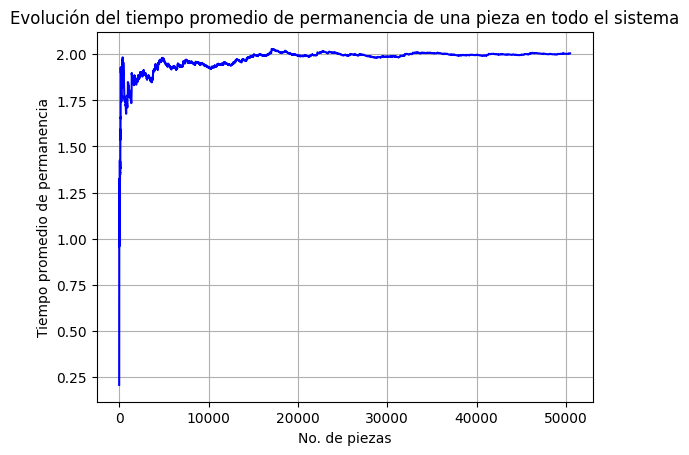

In [340]:
plt.plot(evol_perma, 'b')   
plt.xlabel('No. de piezas')    
plt.ylabel('Tiempo promedio de permanencia')
plt.grid(True)
plt.title('Evolución del tiempo promedio de permanencia de una pieza en todo el sistema')
plt.show()

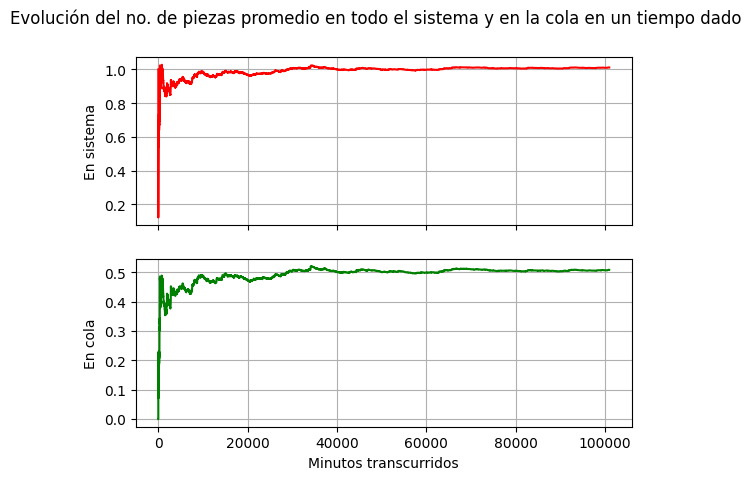

In [341]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Evolución del no. de piezas promedio en todo el sistema y en la cola en un tiempo dado')
color = ['b', 'r', 'g']
labely = ['En sistema', 'En cola']
for i in range(2):
  axs[i].plot(evol[i+1], color[i+1])
  axs[i].set(xlabel = 'Minutos transcurridos', ylabel = labely[i])  
  axs[i].grid()

for ax in axs.flat:
    ax.label_outer()

plt.show()

In [342]:
T = 40000

In [343]:
print('Permanencia: mu =', np.mean(evol_perma), ', sigma =', np.std(evol_perma))
print('No. piezas en sistema: mu =', np.mean(evol_n_sist), ', sigma =', np.std(evol_n_sist))
print('No. piezas en cola: mu =', np.mean(evol_n_cola), ', sigma =', np.std(evol_n_cola))

Permanencia: mu = 1.9748107838830218 , sigma = 0.05960144035651648
No. piezas en sistema: mu = 0.9922072880314784 , sigma = 0.03262433143788335
No. piezas en cola: mu = 0.49410696474046867 , sigma = 0.028302164497649586


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align*}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align*}

Implementamos el siguiente código:

In [362]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error del promedio estimado.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [363]:
N_W = int(np.ceil((2*np.std(evol_perma)*norm.ppf(1-alpha/2)/epsilon)**2))
N_sist = int(np.ceil((2*np.std(evol_n_sist)*norm.ppf(1-alpha/2)/epsilon)**2))
N_cola = int(np.ceil((2*np.std(evol_n_cola)*norm.ppf(1-alpha/2)/epsilon)**2))
N_L = max([N_sist, N_cola])
print(N_W)
print(N_L)

546
164


In [348]:
def simulacion_W(N_W, T):
  perma = []
  for i in range(N_W):
    evol_perma = experimento_W(T)[1]
    perma.append(np.mean(evol_perma))
  return perma

In [349]:
def simulacion_L(N_L, T):
  n_sist, n_cola = [],[]
  for i in range(N_L):
    bucket, evol_n_sist, evol_n_cola = experimento(T)
    n_sist.append(np.mean(evol_n_sist))
    n_cola.append(np.mean(evol_n_cola))
  return n_sist, n_cola

In [364]:
perma = simulacion_W(N_W, T)
n_sist, n_cola = simulacion_L(N_L, T)

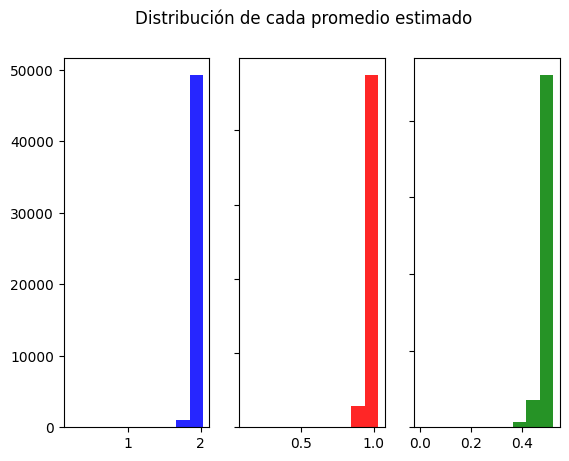

In [365]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Distribución de cada promedio estimado')
for i in range(3):
  axs[i].hist(evol[i], color = color[i], alpha = 0.85)
  axs[i].grid(False)

for ax in axs.flat:
    ax.label_outer()

plt.show()

In [366]:
print('Permanencia: mu =', np.mean(perma), ', sigma =', np.std(perma))
print('Piezas en sistema: mu =', np.mean(n_sist), ', sigma =', np.std(n_sist))
print('Piezas en cola: mu =', np.mean(n_cola), ', sigma =', np.std(n_cola))

Permanencia: mu = 2.0018246393826757 , sigma = 0.059232294913020886
Piezas en sistema: mu = 0.9985381847047199 , sigma = 0.036534734757294254
Piezas en cola: mu = 0.49831862844631014 , sigma = 0.030731255923383285


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align*}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align*}

Implementamos el siguiente código:

In [367]:
mu = [np.mean(perma), np.mean(n_sist), np.mean(n_cola)]  
                                                               # Se presenta el intervalos de confianza para la media estimada, de la
li = mu[0] - norm.ppf(1-alpha/2) * np.std(perma)/np.sqrt(n)    #forma: 
ls = mu[0] + norm.ppf(1-alpha/2) * np.std(perma)/np.sqrt(n)    #
print('Permanencia: ',li, '<', mu[0], '<', ls)                 #        Límite inferior < Media estimada < Límite superior

li = mu[1] - norm.ppf(1-alpha/2) * np.std(n_sist)/np.sqrt(n) 
ls = mu[1] + norm.ppf(1-alpha/2) * np.std(n_sist)/np.sqrt(n)
print('Piezas en sistema: ',li, '<', mu[1], '<', ls)

li = mu[2] - norm.ppf(1-alpha/2) * np.std(n_cola)/np.sqrt(n)
ls = mu[2] + norm.ppf(1-alpha/2) * np.std(n_cola)/np.sqrt(n)
print('Piezas en cola: ',li, '<', mu[2], '<', ls)

Permanencia:  1.9995115491930238 < 2.0018246393826757 < 2.0041377295723275
Piezas en sistema:  0.9971114607077394 < 0.9985381847047199 < 0.9999649087017004
Piezas en cola:  0.4971185370654774 < 0.49831862844631014 < 0.4995187198271429


## **8. Comparamos con la solución analítica.**

Al estarse trabajando un problema de líneas de espera con sólo una fila de clientes, un solo servidor y criterio de prioridad FIFO; la fórmula ya conocida para calcular el tiempo de permanencia promedio $\,W\,$ en el sistema de un solo cliente es 

$$W = \frac{1}{\mu - \lambda}$$

donde $\,\lambda\,$ es el número promedio de llegadas de clientes por periodo y $\,\mu\,$ es el número medio de clientes que completan el servicio en cada periodo.

Por lo planteado anteriormente a lo largo de la resolución del problema, se deduce fácilmente que

  \begin{align*}
  \lambda &= \lambda_1 = 0.5\;\,\text{piezas/minuto} \\
  \mu &= \lambda_2 = 1\;\,\text{pieza/minuto}
  \end{align*}

Por lo tanto, el tiempo de permanencia promedio $\,W\,$ en el sistema es de

$$W = \frac{1}{1 - 0.5} = \frac{1}{0.5} = 2\;\,\text{minutos}$$

El no. de piezas promedio $\,L\,$ que hay en el sistema es de

$$L = \frac{\lambda}{\mu - \lambda} = \frac{0.5}{1 - 0.5} = \frac{0.5}{0.5} = 1\;\,\text{pieza}$$

Y el no. de piezas promedio $\,L\,$ que hay en la cola es de

$$L_q = \frac{\lambda^2}{\mu(\mu - \lambda)} = \frac{(0.5)^2}{1(1 - 0.5)} = \frac{0.25}{0.5} = 0.5\;\,\text{piezas}$$

In [368]:
mu_ana = [2, 1, 0.5]
print(mu_ana)

[2, 1, 0.5]


# **Solución**

In [369]:
print('El tiempo de permanencia promedio en el sistema, estimado mediante simulación, para una sola pieza es')
print('de ' + str(mu[0]) + ' minutos.\n')
print('El cual difiere en un ' + str(abs(mu[0] - mu_ana[0])*100 / mu_ana[0]) + '% de la solución analítica.')
print('\n\n')

print('El no. de piezas promedio que hay en todo el sistema, estimado mediante simulación, es')
print('de ' + str(mu[1]) + ' piezas.\n')
print('El cual difiere en un ' + str(abs(mu[1] - mu_ana[1])*100 / mu_ana[1]) + '% de la solución analítica.')
print('\n\n')

print('El no. de piezas promedio que hay en la cola, estimado mediante simulación, es')
print('de ' + str(mu[2]) + ' piezas.\n')
print('El cual difiere en un ' + str(abs(mu[2] - mu_ana[2])*100 / mu_ana[2]) + '% de la solución analítica.')

El tiempo de permanencia promedio en el sistema, estimado mediante simulación, para una sola pieza es
de 2.0018246393826757 minutos.

El cual difiere en un 0.09123196913378706% de la solución analítica.



El no. de piezas promedio que hay en todo el sistema, estimado mediante simulación, es
de 0.9985381847047199 piezas.

El cual difiere en un 0.1461815295280111% de la solución analítica.



El no. de piezas promedio que hay en la cola, estimado mediante simulación, es
de 0.49831862844631014 piezas.

El cual difiere en un 0.33627431073797176% de la solución analítica.
